<a href="https://colab.research.google.com/github/nbsreenivas/day33-1-07-20-/blob/master/day32(30_06_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# read the data
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
# check for frequency of B and M
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [6]:
# split the dataset into input and output--> train and test
#train-->  building the model
# test--> how well the model has learnt 

In [7]:
# preparing input and output
X = data.drop(['id','diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [8]:
# output access
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [9]:
# preparing training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 1)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(398, 30)
(171, 30)
(398,)
(171,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[-0.62597235,  2.027343  , -0.64848473, ..., -0.65881245,
        -0.76762028, -0.10463644],
       [ 2.86346896,  0.18158215,  3.04094804, ...,  1.63896032,
         0.50452244, -0.20470372],
       [-0.61172973,  0.76082466, -0.56679988, ..., -0.08990281,
        -1.18783774,  0.52010799],
       ...,
       [-1.4685656 , -0.11723343, -1.33744288, ..., -0.01063833,
         0.36171416,  1.16973401],
       [-0.7171251 , -0.74474614, -0.70129111, ..., -0.25516179,
        -0.18161389, -0.19659016],
       [-0.65445758, -1.09413051, -0.59320306, ..., -0.8194352 ,
        -0.30800742,  1.0669622 ]])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
scaled_X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.625972,2.027343,-0.648485,-0.625252,-0.868174,-0.765564,-0.613654,-0.778710,-0.763924,-0.255216,-0.765534,0.863785,-0.661975,-0.566239,0.104165,0.022611,-0.073233,-0.435741,-0.412443,0.224860,-0.680354,2.006085,-0.682386,-0.651969,-0.494785,-0.439900,-0.432806,-0.658812,-0.767620,-0.104636
1,2.863469,0.181582,3.040948,3.154228,3.367497,3.296182,4.240248,3.926236,3.007180,0.815637,3.724581,3.380820,3.167060,3.876464,5.727954,4.077552,3.615609,1.060737,3.033739,2.513274,2.037283,-0.268556,2.201525,2.148313,1.611626,1.033639,1.457322,1.638960,0.504522,-0.204704
2,-0.611730,0.760825,-0.566800,-0.610060,-1.922704,0.016806,-0.125059,-0.511298,-2.257861,0.513637,-1.010177,0.381724,-0.540976,-0.653638,-0.701644,1.130036,0.438159,0.804547,0.479235,1.479730,-0.789648,0.504396,-0.613471,-0.715772,-1.911001,0.398067,0.088495,-0.089903,-1.187838,0.520108
3,-1.290248,-0.301120,-1.296600,-1.072999,-0.956637,-0.952383,-0.937373,-1.132869,-0.528230,0.171463,-0.253079,0.164708,-0.311446,-0.421893,1.386007,-0.725786,-0.789331,-1.300505,0.753503,-0.318397,-1.088104,-0.165386,-1.102499,-0.911339,0.282170,-0.810753,-0.986824,-1.349161,0.233679,-0.277185
4,-0.868097,-1.455008,-0.891889,-0.798962,0.056470,-1.009964,-0.874162,-0.819871,0.015680,-0.253830,-0.650027,-0.778958,-0.702154,-0.533396,0.696568,-0.927212,-0.727469,-0.590116,0.378383,-0.876847,-0.911553,-1.527878,-0.947815,-0.801807,0.079298,-1.031599,-0.953349,-0.899597,-0.091333,-0.873802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.020642,0.721749,0.052850,-0.088357,0.495975,0.164872,0.715279,0.306987,0.363781,-0.424225,-0.726350,1.123493,-0.486941,-0.471360,-0.325108,0.019240,0.565632,0.158288,-0.774034,0.000659,-0.217956,1.414908,-0.103678,-0.282165,0.247639,0.101261,0.714434,0.313897,-0.355610,-0.019714
394,0.108947,0.487293,0.203018,-0.045359,0.608308,1.470041,0.667525,0.991437,1.545877,0.880747,-0.549853,-0.420169,-0.387648,-0.420474,-0.909073,0.284438,-0.170712,0.283904,-0.770344,-0.017819,0.271765,1.241321,0.441024,0.022571,0.873519,2.513966,1.332324,2.316447,2.214939,2.359723
395,-1.468566,-0.117233,-1.337443,-1.192819,0.206716,1.660150,1.358696,-0.011681,1.828710,3.400646,0.168402,1.230223,0.378529,-0.356613,0.986969,2.270611,2.674559,2.225986,1.734964,1.692845,-1.317201,-0.365175,-1.177433,-1.061538,-0.438671,0.727577,0.891988,-0.010638,0.361714,1.169734
396,-0.717125,-0.744746,-0.701291,-0.688315,1.127850,-0.251357,-0.585504,-0.471433,0.099079,0.156225,-0.151883,-0.116346,-0.182595,-0.288291,0.689185,-0.706121,-0.481896,-0.021871,0.088127,-0.222311,-0.632012,-0.661582,-0.637245,-0.604795,0.877835,-0.673766,-0.584793,-0.255162,-0.181614,-0.196590


In [13]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
scaled_X_train

#scaling for test data
# testing the data based on training data
scaled_X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.257070,0.599924,0.196830,0.149563,-0.433584,-0.650219,-0.463104,-0.419141,-0.760297,-0.837051,-0.359045,-0.685747,-0.393652,-0.240852,-0.830672,-0.853328,-0.574876,-0.426485,-1.211878,-0.872741,0.372651,0.992404,0.299582,0.263142,0.286486,-0.315871,-0.006201,0.565151,-0.393364,-0.278267
1,3.285050,-0.448229,3.370988,3.867987,1.275288,2.374886,3.109242,3.669956,0.472563,-0.231665,1.972557,-0.655507,1.973229,2.256623,-0.235105,0.951927,0.423537,0.541746,0.313199,-0.151683,3.531667,-0.335698,3.658076,4.246762,0.895101,2.078321,1.764137,2.398703,1.272732,0.231265
2,-0.121784,0.661986,-0.076691,-0.205596,1.633350,0.371432,0.617258,0.407169,0.030184,0.815637,0.692442,1.587766,0.903630,0.160358,2.377447,0.449063,0.573130,1.454112,0.748583,0.226503,0.013242,1.372330,0.116009,-0.140100,1.788599,0.341298,0.513205,0.779015,0.271433,0.511454
3,0.812532,-0.075859,0.862685,0.671839,1.219121,0.928963,1.277012,1.539463,1.107124,0.050940,-0.408792,-0.961287,-0.367789,-0.198886,-0.529373,-0.303829,-0.030492,0.336794,-1.111026,-0.582429,0.685821,-0.121171,0.775068,0.550527,1.641841,0.842350,1.085641,2.080149,0.319036,0.364328
4,-0.700034,-1.238941,-0.752860,-0.668823,-1.306275,-1.151266,-0.841111,-0.566955,0.998342,-0.242748,0.497545,0.086440,0.354513,-0.080287,0.350267,-0.621842,-0.608244,1.100405,1.033920,-0.718346,-0.634114,-1.206907,-0.693521,-0.633895,-1.237208,-1.060662,-0.971388,-0.483234,0.305904,-0.919238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.765550,1.038953,-0.741308,-0.737046,-0.289657,-0.078248,0.274186,-0.219553,-1.587039,0.390344,-0.603347,2.996594,-0.468006,-0.503189,0.408629,0.243422,0.975420,0.143413,-0.728527,0.403893,-0.808564,1.888177,-0.766348,-0.741438,-0.106307,-0.032024,0.428452,-0.279390,-1.317514,0.186370
167,2.299461,0.059757,2.488131,2.431870,2.517976,3.115213,4.235221,3.436974,2.648200,1.040059,2.722840,0.579174,3.279285,2.599243,-0.183775,3.438155,2.723299,2.148303,1.268831,0.526670,2.537513,0.389764,2.980960,2.667051,1.633208,2.732405,3.258910,2.629019,1.871871,0.758106
168,-0.554759,-0.337897,-0.586602,-0.574228,-0.715822,-0.723704,-0.635017,-0.678787,0.523328,-0.083436,-0.667404,-0.421770,-0.676754,-0.512515,-0.534295,-0.554419,-0.428283,-0.641023,-0.346028,-0.521656,-0.575264,-0.067130,-0.636342,-0.578768,-0.455937,-0.481860,-0.370307,-0.495049,0.325602,-0.138172
169,-0.554759,0.696464,-0.590315,-0.556456,-1.040185,-0.994060,-0.907841,-0.955777,-1.021374,-0.432537,-0.654116,-0.143029,-0.633804,-0.481497,-0.682659,-0.755002,-0.823074,-1.198525,-0.580939,-0.556560,-0.453359,1.041533,-0.451565,-0.472670,-0.287597,-0.471987,-0.707897,-0.775615,0.304263,-0.099768


In [14]:
## model building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, metric='euclidean')
# apply knn object on the data set
# syntex : object name.fit(inpur and output)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [15]:
# predictions on the data
# predict fuctions==>gives the predicted values
# syntex : object name.predict(input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B

In [16]:
# check the acuracy ,classification report 
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       243
           M       0.99      0.94      0.96       155

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [17]:
from sklearn.metrics import accuracy_score
#check the optimum k-vakue
# build the models with multiple k values
scores = []
for k in range (1,20):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_X_train,y_train)
  pred_test = knn_model.predict(scaled_X_test)
  scores.append(accuracy_score(y_test , pred_test))
scores

[0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9707602339181286,
 0.9649122807017544,
 0.9649122807017544,
 0.9707602339181286,
 0.9707602339181286,
 0.9766081871345029,
 0.9707602339181286,
 0.9766081871345029,
 0.9707602339181286,
 0.9766081871345029,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544]

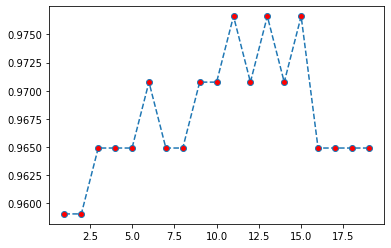

In [18]:
# plot of k values and scores
plt.plot(range(1,20),scores , marker = 'o',markerfacecolor = 'r',linestyle='--')

In [19]:
## optimum k value is 10
final_model = KNeighborsClassifier(n_neighbors=11,metric = 'euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [20]:
# predict on training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B

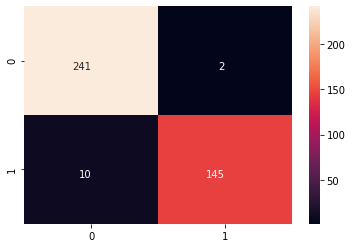

In [21]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot =True,fmt='d',annot_kws={'va':'top','ha':'right'})

In [22]:
#classification report
# precision ==>ppv -->output of the positive predicted value,how many truely positives
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       243
           M       0.99      0.94      0.96       155

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



In [23]:
# predictions on test data
final_test_pred = final_model.predict(scaled_X_test)
final_test_pred

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

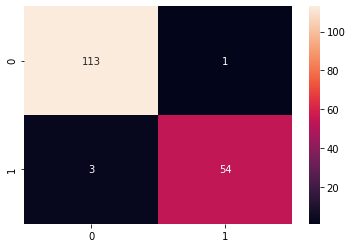

In [24]:
 # comparing actual values of the test data(y_test)and final_test_pred(model predicted values)
 # confusion_matrix(actualvalues,predicted values)
 sns.heatmap(confusion_matrix(y_test,final_test_pred),annot =True,fmt ='d')

In [25]:
# calssification report for test data
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       114
           M       0.98      0.95      0.96        57

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [26]:
# Predict the prob of a tumour being Benign or Malignant
# Predict--> give you the predicted value(B or M)
# Predict_proba--> gives you the probability associated with B and probability 
                                                         ##associated with M
# Syntax: objectname.predict_proba(Input values)

y_test_prob = final_model.predict_proba(scaled_X_test)
y_test_prob = pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,0.090909,0.909091
1,0.000000,1.000000
2,0.272727,0.727273
3,0.000000,1.000000
4,1.000000,0.000000
...,...,...
166,0.818182,0.181818
167,0.000000,1.000000
168,1.000000,0.000000
169,0.909091,0.090909


In [27]:
y_test

421    M
47     M
292    M
186    M
414    B
      ..
6      B
487    M
11     B
268    B
419    M
Name: diagnosis, Length: 171, dtype: object

In [36]:
 #Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
m_prob = final_model.predict_proba(scaled_X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, m_prob, pos_label='M' )

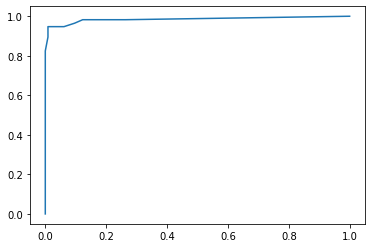

In [37]:
plt.plot(fpr, tpr)

In [38]:
roc_auc_score(y_test, m_prob)

0.9848414896891351

In [39]:
# KFold
#5 folds--> In each and every fold--> create a part of test data and remaining will be of training data
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
kfold.get_n_splits(X, y)

5

In [40]:
model_knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
score = []
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #pass the X_train, y_train into the knn algorithm
    model_knn.fit(X_train, y_train)
    
    # predict the model on test data(X_test, y_test)
    y_pred_test = model_knn.predict(X_test)
    
    # accuracy score of predicted values(y_pred_test) and A.V(y_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    score.append(accuracy)
print(score)
print('Average Score of the model:',np.mean(score))

[0.9122807017543859, 0.9035087719298246, 0.956140350877193, 0.9473684210526315, 0.9469026548672567]
Average Score of the model: 0.9332401800962584
